<a href="https://colab.research.google.com/github/Harshita-2205/Movie-Genre-Classification/blob/main/movie_genre_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!imkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

/bin/bash: line 1: imkdir: command not found
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d hijest/genre-classification-dataset-imdb

Dataset URL: https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb
License(s): other
 70% 29.0M/41.7M [00:00<00:00, 93.6MB/s]
100% 41.7M/41.7M [00:00<00:00, 108MB/s] 


In [4]:
from zipfile import ZipFile
dataset = '/content/genre-classification-dataset-imdb.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print(' dataset extracted :)')

 dataset extracted :)


In [5]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import re
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2

In [6]:
# Load the dataset
data_description = pd.read_csv('/content/Genre Classification Dataset/description.txt',encoding='ISO-8859-1')

#NO. of rows and cols
print(data_description.shape)
data_description.head()

(11, 1)


,Train data:
0,ID ::: TITLE ::: GENRE ::: DESCRIPTION
1,ID ::: TITLE ::: GENRE ::: DESCRIPTION
2,ID ::: TITLE ::: GENRE ::: DESCRIPTION
3,ID ::: TITLE ::: GENRE ::: DESCRIPTION
4,Test data:


In [21]:
# Load the dataset, specifying the separator
data_train = pd.read_csv('/content/Genre Classification Dataset/train_data.txt', encoding='ISO-8859-1',delimiter=':::', index_col=0,names=columns)  # Assuming tab as separator

# NO. of rows and cols
print(data_train.shape)
print(data_train.head())

(54214, 3)
                           Movie Name       Genre  \
1       Oscar et la dame rose (2009)       drama    
2                       Cupid (1997)    thriller    
3   Young, Wild and Wonderful (1980)       adult    
4              The Secret Sin (1915)       drama    
5             The Unrecovered (2007)       drama    

                                         Description  
1   Listening in to a conversation between his do...  
2   A brother and sister with a past incestuous r...  
3   As the bus empties the students for their fie...  
4   To help their unemployed father make ends mee...  
5   The film's title refers not only to the un-re...  


In [22]:
data_test = pd.read_csv('/content/Genre Classification Dataset/test_data.txt', encoding='ISO-8859-1', delimiter=':::', index_col=0,names=columns)  # Assuming tab as separator

# NO. of rows and cols
print(data_test.shape)
print(data_test.head())

(54200, 2)
                                    Genre  \
Movie Name                                  
1                   Edgar's Lunch (1998)    
2              La guerra de papÃ¡ (1977)    
3            Off the Beaten Track (2010)    
4                 Meu Amigo Hindu (2015)    
5                      Er nu zhai (1955)    

                                                  Description  
Movie Name                                                     
1            L.R. Brane loves his life - his car, his apar...  
2            Spain, March 1964: Quico is a very naughty ch...  
3            One year in the life of Albin and his family ...  
4            His father has died, he hasn't spoken with hi...  
5            Before he was known internationally as a mart...  


In [23]:
columns = [ 'Movie Name' , 'Genre' , 'Description']
column = ['Movie Name' , 'Description']
data_train.rename(columns={'Movie Name': 'movie_name', 'Genre': 'genre', 'Description': 'description'}, inplace=True)
data_test.rename(columns={'Movie Name': 'movie_name', 'Genre': 'genre', 'Description': 'description'}, inplace=True)

data_train.head()
data_test.head()

,genre,description
Movie Name,,
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papÃ¡ (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


In [24]:
data_test.head()

,genre,description
Movie Name,,
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papÃ¡ (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


In [26]:
data_train.head()


,movie_name,genre,description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [25]:
data_train.isnull().sum()
data_test.isnull().sum()
data_train.dropna(inplace=True)
data_test.dropna(inplace=True)
data_train.head()

,movie_name,genre,description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [27]:
print(data_train.info())
print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movie_name   54214 non-null  object
 1   genre        54214 non-null  object
 2   description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 54200 entries, 1 to 54200
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   genre        54200 non-null  object
 1   description  54200 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB
None


In [28]:
print(data_train.shape)

(54214, 3)


In [20]:
print(data_train.columns)

Index([' Oscar et la dame rose (2009) ', ' drama ',
       ' Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.'],
      dtype='object')


In [30]:
print("TRAINING DUPLICATES:", data_train.duplicated().sum())
print("TEST DUPLICATES:", data_test.duplicated().sum())

TRAINING DUPLICATES: 0
TEST DUPLICATES: 0


In [32]:
# SEPARATE FEATURES AND LABELS FOR TRAINING AND TEST DATASETS
X_train = data_train['description']
y_train = data_train['genre']
X_test = data_test['description']
y_test = data_test['genre']

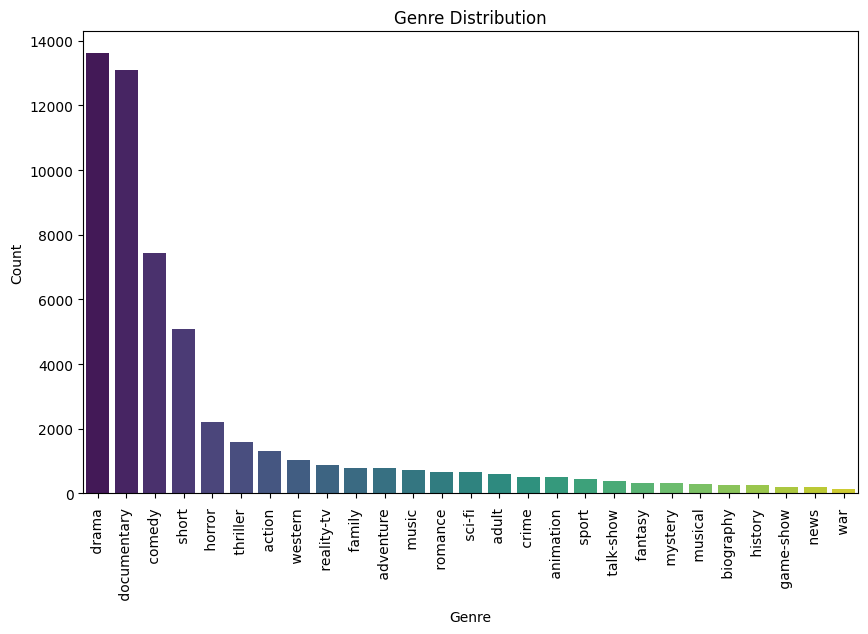

In [34]:
# IMPORTING VISUALIZATION LIBRARIES
import seaborn as sns
import matplotlib.pyplot as plt

# PLOT THE DISTRIBUTION OF GENRES IN THE TRAINING DATASET
plt.figure(figsize=(10,6))
sns.countplot(x='genre' , data=data_train , order=data_train['genre'].value_counts().index ,palette='viridis')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [41]:
# IMPORTING train_test_split FROM sklearn TO SPLIT THE DATA
# IMPORTING train_test_split FROM sklearn TO SPLIT THE DATA
from sklearn.model_selection import train_test_split

# Assuming 'data_train' is your original DataFrame containing both features and labels
X_train_full = data_train['description']
y_train_full = data_train['genre']

# Now you can split the data
X_train, X_test, Y_train, Y_test = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [43]:
print(X_train.shape)
print(X_test.shape)

print('\n')

print(Y_train.shape)
print(Y_test.shape)

(43371,)
(10843,)


(43371,)
(10843,)


In [47]:
# IMPORT TfidfVectorizer FROM sklearn FOR FEATURE EXTRACTION
from sklearn.feature_extraction.text import TfidfVectorizer

# INITIALIZE TF-IDF VECTORIZER
tfidf = TfidfVectorizer(stop_words ='english' , max_features=5000)

# FIT AND TRANSFORM THE TRAINING FEATURES, AND TRANSFORM THE VALIDATION AND TEST FEATURES
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

In [48]:
# IMPORT MULTINOMIAL NAIVE BAYES CLASSIFIER FROM sklearn
from sklearn.naive_bayes import MultinomialNB

# TRAIN THE MULTINOMIAL NAIVE BAYES CLASSIFIER
nb = MultinomialNB()
nb.fit(X_train_vec, Y_train)

MultinomialNB()

In [49]:
y_pred_val = nb.predict(X_val_vec)

In [50]:
# IMPORT EVALUATION METRICS FROM sklearn
from sklearn.metrics import accuracy_score, classification_report

# EVALUATE THE MODEL ON THE VALIDATION SET
accuracy_val = accuracy_score(Y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)
print("Validation Classification Report:")
print(classification_report(Y_val, y_pred_val, zero_division=0))

Validation Accuracy: 0.5233791386147745
Validation Classification Report:
               precision    recall  f1-score   support

      action        0.58      0.08      0.14       263
       adult        0.88      0.06      0.12       112
   adventure        0.29      0.03      0.05       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.51      0.44      0.47      1443
       crime        0.00      0.00      0.00       107
 documentary        0.58      0.88      0.70      2659
       drama        0.46      0.83      0.59      2697
      family        1.00      0.01      0.01       150
     fantasy        0.00      0.00      0.00        74
   game-show        1.00      0.15      0.26        40
     history        0.00      0.00      0.00        45
      horror        0.73      0.36      0.48       431
       music        0.77      0.12      0.20       144
     musical        0.00      0.00      0.00 